In [1]:
import bs4 as bs
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
%pprint
InteractiveShell.ast_node_interactivity = 'all'
lcmc_char = "/Users/ktlan/Documents/Data_Science/project_KyleLandin/2474/Lcmc/data/character/"
lcmc_pinyin = "/Users/ktlan/Documents/Data_Science/project_KyleLandin/2474/Lcmc/data/pinyin/"
#These map to the Character data folder and the Pinyin data folder

Pretty printing has been turned OFF


# News Reportage

In [2]:
newsrep_char = (lcmc_char + 'LCMC_A.xml')
newsrep_infile = open(newsrep_char, 'r', encoding='utf8')
newsrep_contents = newsrep_infile.read()
newsrep_soup = bs.BeautifulSoup(newsrep_contents, 'xml')
# Getting the characters and parts of speech
# Only need the pos from one set of the data since it will be the same in the pinyin data that we will be merging with
nrchar = [w_tag.text for w_tag in newsrep_soup.find_all('w')]
nrpos = [w_tag.get('POS') for w_tag in newsrep_soup.find_all('w')]
# Replacing the tags with their part of speech meanings
tag_dict = {'a': 'adj', 'ad': 'adj as adv', 'ag': 'adj morpheme', 'an': 'adj with nominal func', 'b': 'non-predicate adj', 'bg': 'non-predicate adj morpheme', 'c': 'conjunction', 'cg': 'conjunction morpheme', 'd': 'adv', 'dg': 'adv morpheme', 'e': 'interjection', 'ew': 'sentential punctuation', 'f': 'directional locality', 'fg': 'locality morpheme', 'g': 'morpheme', 'h': 'prefix', 'i': 'idiom', 'j': 'abbreviation', 'k': 'suffix', 'l': 'fixed expressions', 'm': 'numeral', 'mg': 'numeric morpheme', 'n': 'common noun', 'ng': 'noun morpheme', 'nr': 'personal name', 'ns': 'place name', 'nt': 'organization name', 'nx': 'nominal character string', 'nz': 'other proper noun', 'o': 'onomatopoeia', 'p': 'preposition', 'pg': 'preposition morpheme', 'q': 'classifier', 'qg': 'classifier morpheme', 'r': 'pronoun', 'rg': 'pronoun morpheme', 's': 'space word', 't': 'time word', 'tg': 'time word morpheme', 'u': 'auxiliary', 'v': 'verb', 'vd': 'verb as adv', 'vg': 'verb morpheme', 'vn': 'verb with nominal function', 'w': 'symbol and non-sentential punctuation', 'x': 'unclassified items', 'y': 'modal particle', 'yg': 'modal particle morpheme', 'z': 'descriptive', 'zg': 'descriptive morpheme'}
nrpos2 = [tag_dict[tag] for tag in nrpos]
nrpos = nrpos2
# Getting the pinyin from the pinyin xml file
newsrep_pin = (lcmc_pinyin + 'LCMC_A.xml')
newsrep_pin_infile = open(newsrep_pin, 'r', encoding='utf8')
newsrep_pin_contents = newsrep_pin_infile.read()
newsrep_pin_soup = bs.BeautifulSoup(newsrep_pin_contents, 'xml')
# Pinyin into a list
nrpinyin = [w_tag.text for w_tag in newsrep_pin_soup.find_all('w')]
# Combining the character, pinyin, and pos lists into one
nr_tokens = list(zip(nrchar, nrpinyin, nrpos))
nr_unique = set(nr_tokens)

# News Editorial Data

In [3]:
newsedit_char = (lcmc_char + 'LCMC_B.xml')
newsedit_infile = open(newsedit_char, 'r', encoding='utf8')
newsedit_contents = newsedit_infile.read()
newsedit_soup = bs.BeautifulSoup(newsedit_contents, 'xml')

nechar = [w_tag.text for w_tag in newsedit_soup.find_all('w')]
nepos = [w_tag.get('POS') for w_tag in newsedit_soup.find_all('w')]

nepos2 = [tag_dict[tag] for tag in nepos]
nepos = nepos2

newsedit_pin = (lcmc_pinyin + 'LCMC_B.xml')
newsedit_pin_infile = open(newsedit_pin, 'r', encoding='utf8')
newsedit_pin_contents = newsedit_pin_infile.read()
newsedit_pin_soup = bs.BeautifulSoup(newsedit_pin_contents, 'xml')

nepinyin = [w_tag.text for w_tag in newsedit_pin_soup.find_all('w')]

ne_tokens = list(zip(nechar, nepinyin, nepos))
ne_unique = set(ne_tokens)

ne_tokens[:5]

[('缓解', 'huan3jie3', 'verb'), ('南北', 'nan2bei3', 'directional locality'), ('矛盾', 'mao2dun4', 'adj with nominal func'), ('的', 'de5', 'auxiliary'), ('出路', 'chu1lu4', 'common noun')]

# News Review Data

In [4]:
newsrev_char = (lcmc_char + 'LCMC_C.xml')
newsrev_infile = open(newsrev_char, 'r', encoding='utf8')
newsrev_contents = newsrev_infile.read()
newsrev_soup = bs.BeautifulSoup(newsrev_contents, 'xml')

nrvchar = [w_tag.text for w_tag in newsrev_soup.find_all('w')]
nrvpos = [w_tag.get('POS') for w_tag in newsrev_soup.find_all('w')]

nrvpos2 = [tag_dict[tag] for tag in nrvpos]
nrvpos = nrvpos2

newsrev_pin = (lcmc_pinyin + 'LCMC_C.xml')
newsrev_pin_infile = open(newsrev_pin, 'r', encoding='utf8')
newsrev_pin_contents = newsrev_pin_infile.read()
newsrev_pin_soup = bs.BeautifulSoup(newsrev_pin_contents, 'xml')

nrvpinyin = [w_tag.text for w_tag in newsrev_pin_soup.find_all('w')]

nrv_tokens = list(zip(nrvchar, nrvpinyin, nrvpos))
nrv_unique = set(nrv_tokens)

nrv_tokens[:5]

[('德克勒克', 'de2ke4le4ke4', 'personal name'), ('讲话', 'jiang3hua4', 'common noun'), ('初', 'chu1', 'adv morpheme'), ('析', 'xi1', 'verb morpheme'), ('新华社', 'xin1hua2she4', 'organization name')]

# Religion Data

In [5]:
rel_char = (lcmc_char + 'LCMC_D.xml')
rel_infile = open(rel_char, 'r', encoding='utf8')
rel_contents = rel_infile.read()
rel_soup = bs.BeautifulSoup(rel_contents, 'xml')

relchar = [w_tag.text for w_tag in rel_soup.find_all('w')]
relpos = [w_tag.get('POS') for w_tag in rel_soup.find_all('w')]

# New dictionary to account for a misspelling in the xml for a tag. This fixes the problem with 'n '.
rel_dict = {'n ': 'common noun', 'a': 'adj', 'ad': 'adj as adv', 'ag': 'adj morpheme', 'an': 'adj with nominal func', 'b': 'non-predicate adj', 'bg': 'non-predicate adj morpheme', 'c': 'conjunction', 'cg': 'conjunction morpheme', 'd': 'adv', 'dg': 'adv morpheme', 'e': 'interjection', 'ew': 'sentential punctuation', 'f': 'directional locality', 'fg': 'locality morpheme', 'g': 'morpheme', 'h': 'prefix', 'i': 'idiom', 'j': 'abbreviation', 'k': 'suffix', 'l': 'fixed expressions', 'm': 'numeral', 'mg': 'numeric morpheme', 'n': 'common noun', 'ng': 'noun morpheme', 'nr': 'personal name', 'ns': 'place name', 'nt': 'organization name', 'nx': 'nominal character string', 'nz': 'other proper noun', 'o': 'onomatopoeia', 'p': 'preposition', 'pg': 'preposition morpheme', 'q': 'classifier', 'qg': 'classifier morpheme', 'r': 'pronoun', 'rg': 'pronoun morpheme', 's': 'space word', 't': 'time word', 'tg': 'time word morpheme', 'u': 'auxiliary', 'v': 'verb', 'vd': 'verb as adv', 'vg': 'verb morpheme', 'vn': 'verb with nominal function', 'w': 'symbol and non-sentential punctuation', 'x': 'unclassified items', 'y': 'modal particle', 'yg': 'modal particle morpheme', 'z': 'descriptive', 'zg': 'descriptive morpheme'}

relpos2 = [rel_dict[tag] for tag in relpos]
relpos = relpos2

rel_pin = (lcmc_pinyin + 'LCMC_D.xml')
rel_pin_infile = open(rel_pin, 'r', encoding='utf8')
rel_pin_contents = rel_pin_infile.read()
rel_pin_soup = bs.BeautifulSoup(rel_pin_contents, 'xml')

relpinyin = [w_tag.text for w_tag in rel_pin_soup.find_all('w')]

rel_tokens = list(zip(relchar, relpinyin, relpos))
rel_unique = set(rel_tokens)

rel_tokens[:5]

[('一', 'yi1', 'numeral'), ('如何', 'ru2he2', 'pronoun'), ('理解', 'li3jie3', 'verb'), ('佛教', 'fo2jiao4', 'other proper noun'), ('对于', 'dui4yu2', 'preposition')]

# Skills, Trades, and Hobbies Data

In [6]:
sth_char = (lcmc_char + 'LCMC_E.xml')
sth_infile = open(sth_char, 'r', encoding='utf8')
sth_contents = sth_infile.read()
sth_soup = bs.BeautifulSoup(sth_contents, 'xml')

sthchar = [w_tag.text for w_tag in sth_soup.find_all('w')]
sthpos = [w_tag.get('POS') for w_tag in sth_soup.find_all('w')]

sthpos2 = [tag_dict[tag] for tag in sthpos]
sthpos = sthpos2

sth_pin = (lcmc_pinyin + 'LCMC_E.xml')
sth_pin_infile = open(sth_pin, 'r', encoding='utf8')
sth_pin_contents = sth_pin_infile.read()
sth_pin_soup = bs.BeautifulSoup(sth_pin_contents, 'xml')

sthpinyin = [w_tag.text for w_tag in sth_pin_soup.find_all('w')]

sth_tokens = list(zip(sthchar, sthpinyin, sthpos))
sth_unique = set(sth_tokens)

sth_tokens[:5]

[('同事', 'tong2shi4', 'common noun'), ('相处', 'xiang1chu3', 'verb'), ('的', 'de5', 'auxiliary'), ('技巧', 'ji4qiao3', 'common noun'), ('同事', 'tong2shi4', 'common noun')]

# Popular Lore Data

In [7]:
poplore_char = (lcmc_char + 'LCMC_F.xml')
poplore_infile = open(poplore_char, 'r', encoding='utf8')
poplore_contents = poplore_infile.read()
poplore_soup = bs.BeautifulSoup(poplore_contents, 'xml')

poplorechar = [w_tag.text for w_tag in poplore_soup.find_all('w')]
poplorepos = [w_tag.get('POS') for w_tag in poplore_soup.find_all('w')]

poplorepos2 = [tag_dict[tag] for tag in poplorepos]
poplorepos = poplorepos2

poplore_pin = (lcmc_pinyin + 'LCMC_F.xml')
poplore_pin_infile = open(poplore_pin, 'r', encoding='utf8')
poplore_pin_contents = poplore_pin_infile.read()
poplore_pin_soup = bs.BeautifulSoup(poplore_pin_contents, 'xml')

poplorepinyin = [w_tag.text for w_tag in poplore_pin_soup.find_all('w')]

poplore_tokens = list(zip(poplorechar, poplorepinyin, poplorepos))
poplore_unique = set(poplore_tokens)

poplore_tokens[:5]

[('在', 'zai4', 'preposition'), ('高速公路', 'gao1su4gong1lu4', 'common noun'), ('干道', 'gan1dao4', 'common noun'), ('上', 'shang4', 'directional locality'), ('行驶', 'xing2shi3', 'verb')]

# Biography and Essay Data

In [8]:
bio_char = (lcmc_char + 'LCMC_G.xml')
bio_infile = open(bio_char, 'r', encoding='utf8')
bio_contents = bio_infile.read()
bio_soup = bs.BeautifulSoup(bio_contents, 'xml')

biochar = [w_tag.text for w_tag in bio_soup.find_all('w')]
biopos = [w_tag.get('POS') for w_tag in bio_soup.find_all('w')]

# New dictionary to account for a misspelling of the 'nr ' tag.
bio_dict = {'nr ': 'noun morpheme', 'a': 'adj', 'ad': 'adj as adv', 'ag': 'adj morpheme', 'an': 'adj with nominal func', 'b': 'non-predicate adj', 'bg': 'non-predicate adj morpheme', 'c': 'conjunction', 'cg': 'conjunction morpheme', 'd': 'adv', 'dg': 'adv morpheme', 'e': 'interjection', 'ew': 'sentential punctuation', 'f': 'directional locality', 'fg': 'locality morpheme', 'g': 'morpheme', 'h': 'prefix', 'i': 'idiom', 'j': 'abbreviation', 'k': 'suffix', 'l': 'fixed expressions', 'm': 'numeral', 'mg': 'numeric morpheme', 'n': 'common noun', 'ng': 'noun morpheme', 'nr': 'personal name', 'ns': 'place name', 'nt': 'organization name', 'nx': 'nominal character string', 'nz': 'other proper noun', 'o': 'onomatopoeia', 'p': 'preposition', 'pg': 'preposition morpheme', 'q': 'classifier', 'qg': 'classifier morpheme', 'r': 'pronoun', 'rg': 'pronoun morpheme', 's': 'space word', 't': 'time word', 'tg': 'time word morpheme', 'u': 'auxiliary', 'v': 'verb', 'vd': 'verb as adv', 'vg': 'verb morpheme', 'vn': 'verb with nominal function', 'w': 'symbol and non-sentential punctuation', 'x': 'unclassified items', 'y': 'modal particle', 'yg': 'modal particle morpheme', 'z': 'descriptive', 'zg': 'descriptive morpheme'}

biopos2 = [bio_dict[tag] for tag in biopos]
biopos = biopos2

bio_pin = (lcmc_pinyin + 'LCMC_G.xml')
bio_pin_infile = open(bio_pin, 'r', encoding='utf8')
bio_pin_contents = bio_pin_infile.read()
bio_pin_soup = bs.BeautifulSoup(bio_pin_contents, 'xml')

biopinyin = [w_tag.text for w_tag in bio_pin_soup.find_all('w')]

bio_tokens = list(zip(biochar, biopinyin, biopos))
bio_unique = set(bio_tokens)

bio_tokens[:5]

[('第二', 'di4er4', 'numeral'), ('章', 'zhang1', 'classifier'), ('是', 'shi4', 'verb'), ('缪斯', 'miao4si1', 'personal name'), ('的', 'de5', 'auxiliary')]

# Miscellaneous: Reports and Official Documents Data

In [9]:
misc_char = (lcmc_char + 'LCMC_H.xml')
misc_infile = open(misc_char, 'r', encoding='utf8')
misc_contents = misc_infile.read()
misc_soup = bs.BeautifulSoup(misc_contents, 'xml')

miscchar = [w_tag.text for w_tag in misc_soup.find_all('w')]
miscpos = [w_tag.get('POS') for w_tag in misc_soup.find_all('w')]

miscpos2 = [tag_dict[tag] for tag in miscpos]
miscpos = miscpos2

misc_pin = (lcmc_pinyin + 'LCMC_H.xml')
misc_pin_infile = open(misc_pin, 'r', encoding='utf8')
misc_pin_contents = misc_pin_infile.read()
misc_pin_soup = bs.BeautifulSoup(misc_pin_contents, 'xml')

miscpinyin = [w_tag.text for w_tag in misc_pin_soup.find_all('w')]

misc_tokens = list(zip(miscchar, miscpinyin, miscpos))
misc_unique = set(misc_tokens)

misc_tokens[:5]

[('全国', 'quan2guo2', 'common noun'), ('人民', 'ren2min2', 'common noun'), ('代表大会', 'dai4biao3da4hui4', 'common noun'), ('常务', 'chang2wu4', 'non-predicate adj'), ('委员会', 'wei3yuan2hui4', 'common noun')]

# Science: Academic Prose Data

In [10]:
sci_char = (lcmc_char + 'LCMC_J.xml')
sci_infile = open(sci_char, 'r', encoding='utf8')
sci_contents = sci_infile.read()
sci_soup = bs.BeautifulSoup(sci_contents, 'xml')

scichar = [w_tag.text for w_tag in sci_soup.find_all('w')]
scipos = [w_tag.get('POS') for w_tag in sci_soup.find_all('w')]

scipos2 = [tag_dict[tag] for tag in scipos]
scipos = scipos2

sci_pin = (lcmc_pinyin + 'LCMC_J.xml')
sci_pin_infile = open(sci_pin, 'r', encoding='utf8')
sci_pin_contents = sci_pin_infile.read()
sci_pin_soup = bs.BeautifulSoup(sci_pin_contents, 'xml')

scipinyin = [w_tag.text for w_tag in sci_pin_soup.find_all('w')]

sci_tokens = list(zip(scichar, scipinyin, scipos))
sci_unique = set(sci_tokens)

sci_tokens[:5]

[('第一', 'di4yi1', 'numeral'), ('节', 'jie2', 'classifier'), ('肥胖', 'fei2pang4', 'adj'), ('的', 'de5', 'auxiliary'), ('病因', 'bing4yin1', 'common noun')]

# General Fiction Data

In [11]:
gen_fic_char = (lcmc_char + 'LCMC_K.xml')
gen_fic_infile = open(gen_fic_char, 'r', encoding='utf8')
gen_fic_contents = gen_fic_infile.read()
gen_fic_soup = bs.BeautifulSoup(gen_fic_contents, 'xml')

gen_ficchar = [w_tag.text for w_tag in gen_fic_soup.find_all('w')]
gen_ficpos = [w_tag.get('POS') for w_tag in gen_fic_soup.find_all('w')]

# Had an error due to a misspelled tag. This dictionary fixes the problem with ' ng ' and 'n '.
gen_fic_dict = {'n ': 'common noun', ' ng ': 'noun morpheme', 'a': 'adj', 'ad': 'adj as adv', 'ag': 'adj morpheme', 'an': 'adj with nominal func', 'b': 'non-predicate adj', 'bg': 'non-predicate adj morpheme', 'c': 'conjunction', 'cg': 'conjunction morpheme', 'd': 'adv', 'dg': 'adv morpheme', 'e': 'interjection', 'ew': 'sentential punctuation', 'f': 'directional locality', 'fg': 'locality morpheme', 'g': 'morpheme', 'h': 'prefix', 'i': 'idiom', 'j': 'abbreviation', 'k': 'suffix', 'l': 'fixed expressions', 'm': 'numeral', 'mg': 'numeric morpheme', 'n': 'common noun', 'ng': 'noun morpheme', 'nr': 'personal name', 'ns': 'place name', 'nt': 'organization name', 'nx': 'nominal character string', 'nz': 'other proper noun', 'o': 'onomatopoeia', 'p': 'preposition', 'pg': 'preposition morpheme', 'q': 'classifier', 'qg': 'classifier morpheme', 'r': 'pronoun', 'rg': 'pronoun morpheme', 's': 'space word', 't': 'time word', 'tg': 'time word morpheme', 'u': 'auxiliary', 'v': 'verb', 'vd': 'verb as adv', 'vg': 'verb morpheme', 'vn': 'verb with nominal function', 'w': 'symbol and non-sentential punctuation', 'x': 'unclassified items', 'y': 'modal particle', 'yg': 'modal particle morpheme', 'z': 'descriptive', 'zg': 'descriptive morpheme'}

gen_ficpos2 = [gen_fic_dict[tag] for tag in gen_ficpos]
gen_ficpos = gen_ficpos2

gen_fic_pin = (lcmc_pinyin + 'LCMC_K.xml')
gen_fic_pin_infile = open(gen_fic_pin, 'r', encoding='utf8')
gen_fic_pin_contents = gen_fic_pin_infile.read()
gen_fic_pin_soup = bs.BeautifulSoup(gen_fic_pin_contents, 'xml')

gen_ficpinyin = [w_tag.text for w_tag in gen_fic_pin_soup.find_all('w')]

gen_fic_tokens = list(zip(gen_ficchar, gen_ficpinyin, gen_ficpos))
gen_fic_unique = set(gen_fic_tokens)

gen_fic_tokens[:5]

[('什么', 'shen2me5', 'pronoun'), ('事情', 'shi4qing2', 'common noun'), ('都', 'dou1', 'adv'), ('是', 'shi4', 'verb'), ('说', 'shuo1', 'verb')]

# Mystery and Detective Fiction Data

In [12]:
myst_char = (lcmc_char + 'LCMC_L.xml')
myst_infile = open(myst_char, 'r', encoding='utf8')
myst_contents = myst_infile.read()
myst_soup = bs.BeautifulSoup(myst_contents, 'xml')

mystchar = [w_tag.text for w_tag in myst_soup.find_all('w')]
mystpos = [w_tag.get('POS') for w_tag in myst_soup.find_all('w')]

# Had an error due to one misspelled tag in the xml. This dictionary fixes this specific problem with 'nr '.
mystpos_dict = {'nr ': 'personal name', 'a': 'adj', 'ad': 'adj as adv', 'ag': 'adj morpheme', 'an': 'adj with nominal func', 'b': 'non-predicate adj', 'bg': 'non-predicate adj morpheme', 'c': 'conjunction', 'cg': 'conjunction morpheme', 'd': 'adv', 'dg': 'adv morpheme', 'e': 'interjection', 'ew': 'sentential punctuation', 'f': 'directional locality', 'fg': 'locality morpheme', 'g': 'morpheme', 'h': 'prefix', 'i': 'idiom', 'j': 'abbreviation', 'k': 'suffix', 'l': 'fixed expressions', 'm': 'numeral', 'mg': 'numeric morpheme', 'n': 'common noun', 'ng': 'noun morpheme', 'nr': 'personal name', 'ns': 'place name', 'nt': 'organization name', 'nx': 'nominal character string', 'nz': 'other proper noun', 'o': 'onomatopoeia', 'p': 'preposition', 'pg': 'preposition morpheme', 'q': 'classifier', 'qg': 'classifier morpheme', 'r': 'pronoun', 'rg': 'pronoun morpheme', 's': 'space word', 't': 'time word', 'tg': 'time word morpheme', 'u': 'auxiliary', 'v': 'verb', 'vd': 'verb as adv', 'vg': 'verb morpheme', 'vn': 'verb with nominal function', 'w': 'symbol and non-sentential punctuation', 'x': 'unclassified items', 'y': 'modal particle', 'yg': 'modal particle morpheme', 'z': 'descriptive', 'zg': 'descriptive morpheme'}

mystpos2 = [mystpos_dict[tag] for tag in mystpos]
mystpos = mystpos2

myst_pin = (lcmc_pinyin + 'LCMC_L.xml')
myst_pin_infile = open(myst_pin, 'r', encoding='utf8')
myst_pin_contents = myst_pin_infile.read()
myst_pin_soup = bs.BeautifulSoup(myst_pin_contents, 'xml')

mystpinyin = [w_tag.text for w_tag in myst_pin_soup.find_all('w')]

myst_tokens = list(zip(mystchar, mystpinyin, mystpos))
myst_unique = set(myst_tokens)

myst_tokens[:5]

[('八', 'ba1', 'numeral'), ('致命', 'zhi4ming4', 'verb'), ('的', 'de5', 'auxiliary'), ('侥幸', 'jiao3xing4', 'adj'), ('心理', 'xin1li3', 'common noun')]

# Science Fiction Data

In [13]:
sci_fic_char = (lcmc_char + 'LCMC_M.xml')
sci_fic_infile = open(sci_fic_char, 'r', encoding='utf8')
sci_fic_contents = sci_fic_infile.read()
sci_fic_soup = bs.BeautifulSoup(sci_fic_contents, 'xml')

sci_ficchar = [w_tag.text for w_tag in sci_fic_soup.find_all('w')]
sci_ficpos = [w_tag.get('POS') for w_tag in sci_fic_soup.find_all('w')]

sci_ficpos2 = [tag_dict[tag] for tag in sci_ficpos]
sci_ficpos = sci_ficpos2

sci_fic_pin = (lcmc_pinyin + 'LCMC_M.xml')
sci_fic_pin_infile = open(sci_fic_pin, 'r', encoding='utf8')
sci_fic_pin_contents = sci_fic_pin_infile.read()
sci_fic_pin_soup = bs.BeautifulSoup(sci_fic_pin_contents, 'xml')

sci_ficpinyin = [w_tag.text for w_tag in sci_fic_pin_soup.find_all('w')]

sci_fic_tokens = list(zip(sci_ficchar, sci_ficpinyin, sci_ficpos))
sci_fic_unique = set(sci_fic_tokens)

sci_fic_tokens[:5]

[('第五', 'di4wu3', 'numeral'), ('部', 'bu4', 'classifier'), ('预', 'yu4', 'adv'), ('知', 'zhi1', 'verb'), ('能力', 'neng2li4', 'common noun')]

# Adventure and Martial Arts Fiction Data

In [14]:
ama_fic_char = (lcmc_char + 'LCMC_N.xml')
ama_fic_infile = open(ama_fic_char, 'r', encoding='utf8')
ama_fic_contents = ama_fic_infile.read()
ama_fic_soup = bs.BeautifulSoup(ama_fic_contents, 'xml')

ama_ficchar = [w_tag.text for w_tag in ama_fic_soup.find_all('w')]
ama_ficpos = [w_tag.get('POS') for w_tag in ama_fic_soup.find_all('w')]

ama_ficpos2 = [tag_dict[tag] for tag in ama_ficpos]
ama_ficpos = ama_ficpos2

ama_fic_pin = (lcmc_pinyin + 'LCMC_N.xml')
ama_fic_pin_infile = open(ama_fic_pin, 'r', encoding='utf8')
ama_fic_pin_contents = ama_fic_pin_infile.read()
ama_fic_pin_soup = bs.BeautifulSoup(ama_fic_pin_contents, 'xml')

ama_ficpinyin = [w_tag.text for w_tag in ama_fic_pin_soup.find_all('w')]

ama_fic_tokens = list(zip(ama_ficchar, ama_ficpinyin, ama_ficpos))
ama_fic_unique = set(ama_fic_tokens)

ama_fic_tokens[:5]

[('云', 'yun2', 'common noun'), ('在', 'zai4', 'preposition'), ('天空', 'tian1kong1', 'common noun'), ('游荡', 'you2dang4', 'verb with nominal function'), ('它', 'ta1', 'pronoun')]

# Romantic Fiction Data

In [15]:
rom_fic_char = (lcmc_char + 'LCMC_P.xml')
rom_fic_infile = open(rom_fic_char, 'r', encoding='utf8')
rom_fic_contents = rom_fic_infile.read()
rom_fic_soup = bs.BeautifulSoup(rom_fic_contents, 'xml')

rom_ficchar = [w_tag.text for w_tag in rom_fic_soup.find_all('w')]
rom_ficpos = [w_tag.get('POS') for w_tag in rom_fic_soup.find_all('w')]

rom_ficpos2 = [tag_dict[tag] for tag in rom_ficpos]
rom_ficpos = rom_ficpos2

rom_fic_pin = (lcmc_pinyin + 'LCMC_P.xml')
rom_fic_pin_infile = open(rom_fic_pin, 'r', encoding='utf8')
rom_fic_pin_contents = rom_fic_pin_infile.read()
rom_fic_pin_soup = bs.BeautifulSoup(rom_fic_pin_contents, 'xml')

rom_ficpinyin = [w_tag.text for w_tag in rom_fic_pin_soup.find_all('w')]

rom_fic_tokens = list(zip(rom_ficchar, rom_ficpinyin, rom_ficpos))
rom_fic_unique = set(rom_fic_tokens)

rom_fic_tokens[:5]

[('萍', 'ping2', 'noun morpheme'), ('聚', 'ju4', 'verb'), ('特别', 'te4bie2', 'adv'), ('是', 'shi4', 'verb'), ('外面', 'wai4mian4', 'directional locality')]

# Humor Data

In [16]:
humor_char = (lcmc_char + 'LCMC_R.xml')
humor_infile = open(humor_char, 'r', encoding='utf8')
humor_contents = humor_infile.read()
humor_soup = bs.BeautifulSoup(humor_contents, 'xml')

humorchar = [w_tag.text for w_tag in humor_soup.find_all('w')]
humorpos = [w_tag.get('POS') for w_tag in humor_soup.find_all('w')]

humorpos2 = [tag_dict[tag] for tag in humorpos]
humorpos = humorpos2

humor_pin = (lcmc_pinyin + 'LCMC_R.xml')
humor_pin_infile = open(humor_pin, 'r', encoding='utf8')
humor_pin_contents = humor_pin_infile.read()
humor_pin_soup = bs.BeautifulSoup(humor_pin_contents, 'xml')

humorpinyin = [w_tag.text for w_tag in humor_pin_soup.find_all('w')]

humor_tokens = list(zip(humorchar, humorpinyin, humorpos))
humor_unique = set(humor_tokens)

humor_tokens[:5]

[('排队', 'pai2dui4', 'verb'), ('打耳光', 'da3er3guang1', 'fixed expressions'), ('江湖', 'jiang1hu2', 'common noun'), ('医生', 'yi1sheng1', 'common noun'), ('卖', 'mai4', 'verb')]

# Compiled Data

In [17]:
# Combine all lists of data to allow for analysis of entire corpus
Compiled_Data = nr_tokens + ne_tokens + nrv_tokens + rel_tokens + sth_tokens + poplore_tokens + bio_tokens + misc_tokens + sci_tokens + gen_fic_tokens + myst_tokens + sci_fic_tokens + ama_fic_tokens + rom_fic_tokens + humor_tokens
len(Compiled_Data)
Compiled_Unique = set(Compiled_Data)
Compiled_Unique = list(Compiled_Unique)
len(Compiled_Unique)

839006

53376

# Data Collection

In [18]:
from collections import Counter

freq = Counter(Compiled_Data)
freq.most_common(20)

[(('的', 'de5', 'auxiliary'), 50832), (('是', 'shi4', 'verb'), 11427), (('了', 'le5', 'auxiliary'), 10379), (('在', 'zai4', 'preposition'), 9899), (('一', 'yi1', 'numeral'), 8365), (('和', 'he2', 'conjunction'), 7200), (('他', 'ta1', 'pronoun'), 5847), (('不', 'bu4', 'adv'), 5594), (('我', 'wo3', 'pronoun'), 5575), (('有', 'you3', 'verb'), 4957), (('这', 'zhe4', 'pronoun'), 4142), (('人', 'ren2', 'common noun'), 4025), (('也', 'ye3', 'adv'), 3895), (('说', 'shuo1', 'verb'), 3668), (('上', 'shang4', 'directional locality'), 3558), (('着', 'zhao2', 'auxiliary'), 3364), (('就', 'jiu4', 'adv'), 3236), (('地', 'di4', 'auxiliary'), 3209), (('中', 'zhong1', 'directional locality'), 3175), (('对', 'dui4', 'preposition'), 3155)]

In [19]:
Compiled_df = pd.DataFrame(Compiled_Unique)

In [20]:
Compiled_df.columns = ['Characters','Pinyin','POS']
Compiled_df.head()
Compiled_df.tail()

,Characters,Pinyin,POS
0,计,ji4,noun morpheme
1,密林,mi4lin2,common noun
2,左店乡,zuo3dian4xiang1,place name
3,耕田,geng1tian2,verb
4,４２０００,４２０００,numeral


,Characters,Pinyin,POS
53371,Ｓａｎｄｙ,Ｓａｎｄｙ,nominal character string
53372,蜂,feng1,common noun
53373,毕恭毕敬,bi4gong1bi4jing4,idiom
53374,似笑非笑,si4xiao4fei1xiao4,fixed expressions
53375,军服,jun1fu2,common noun


In [21]:
import matplotlib.pyplot as plt

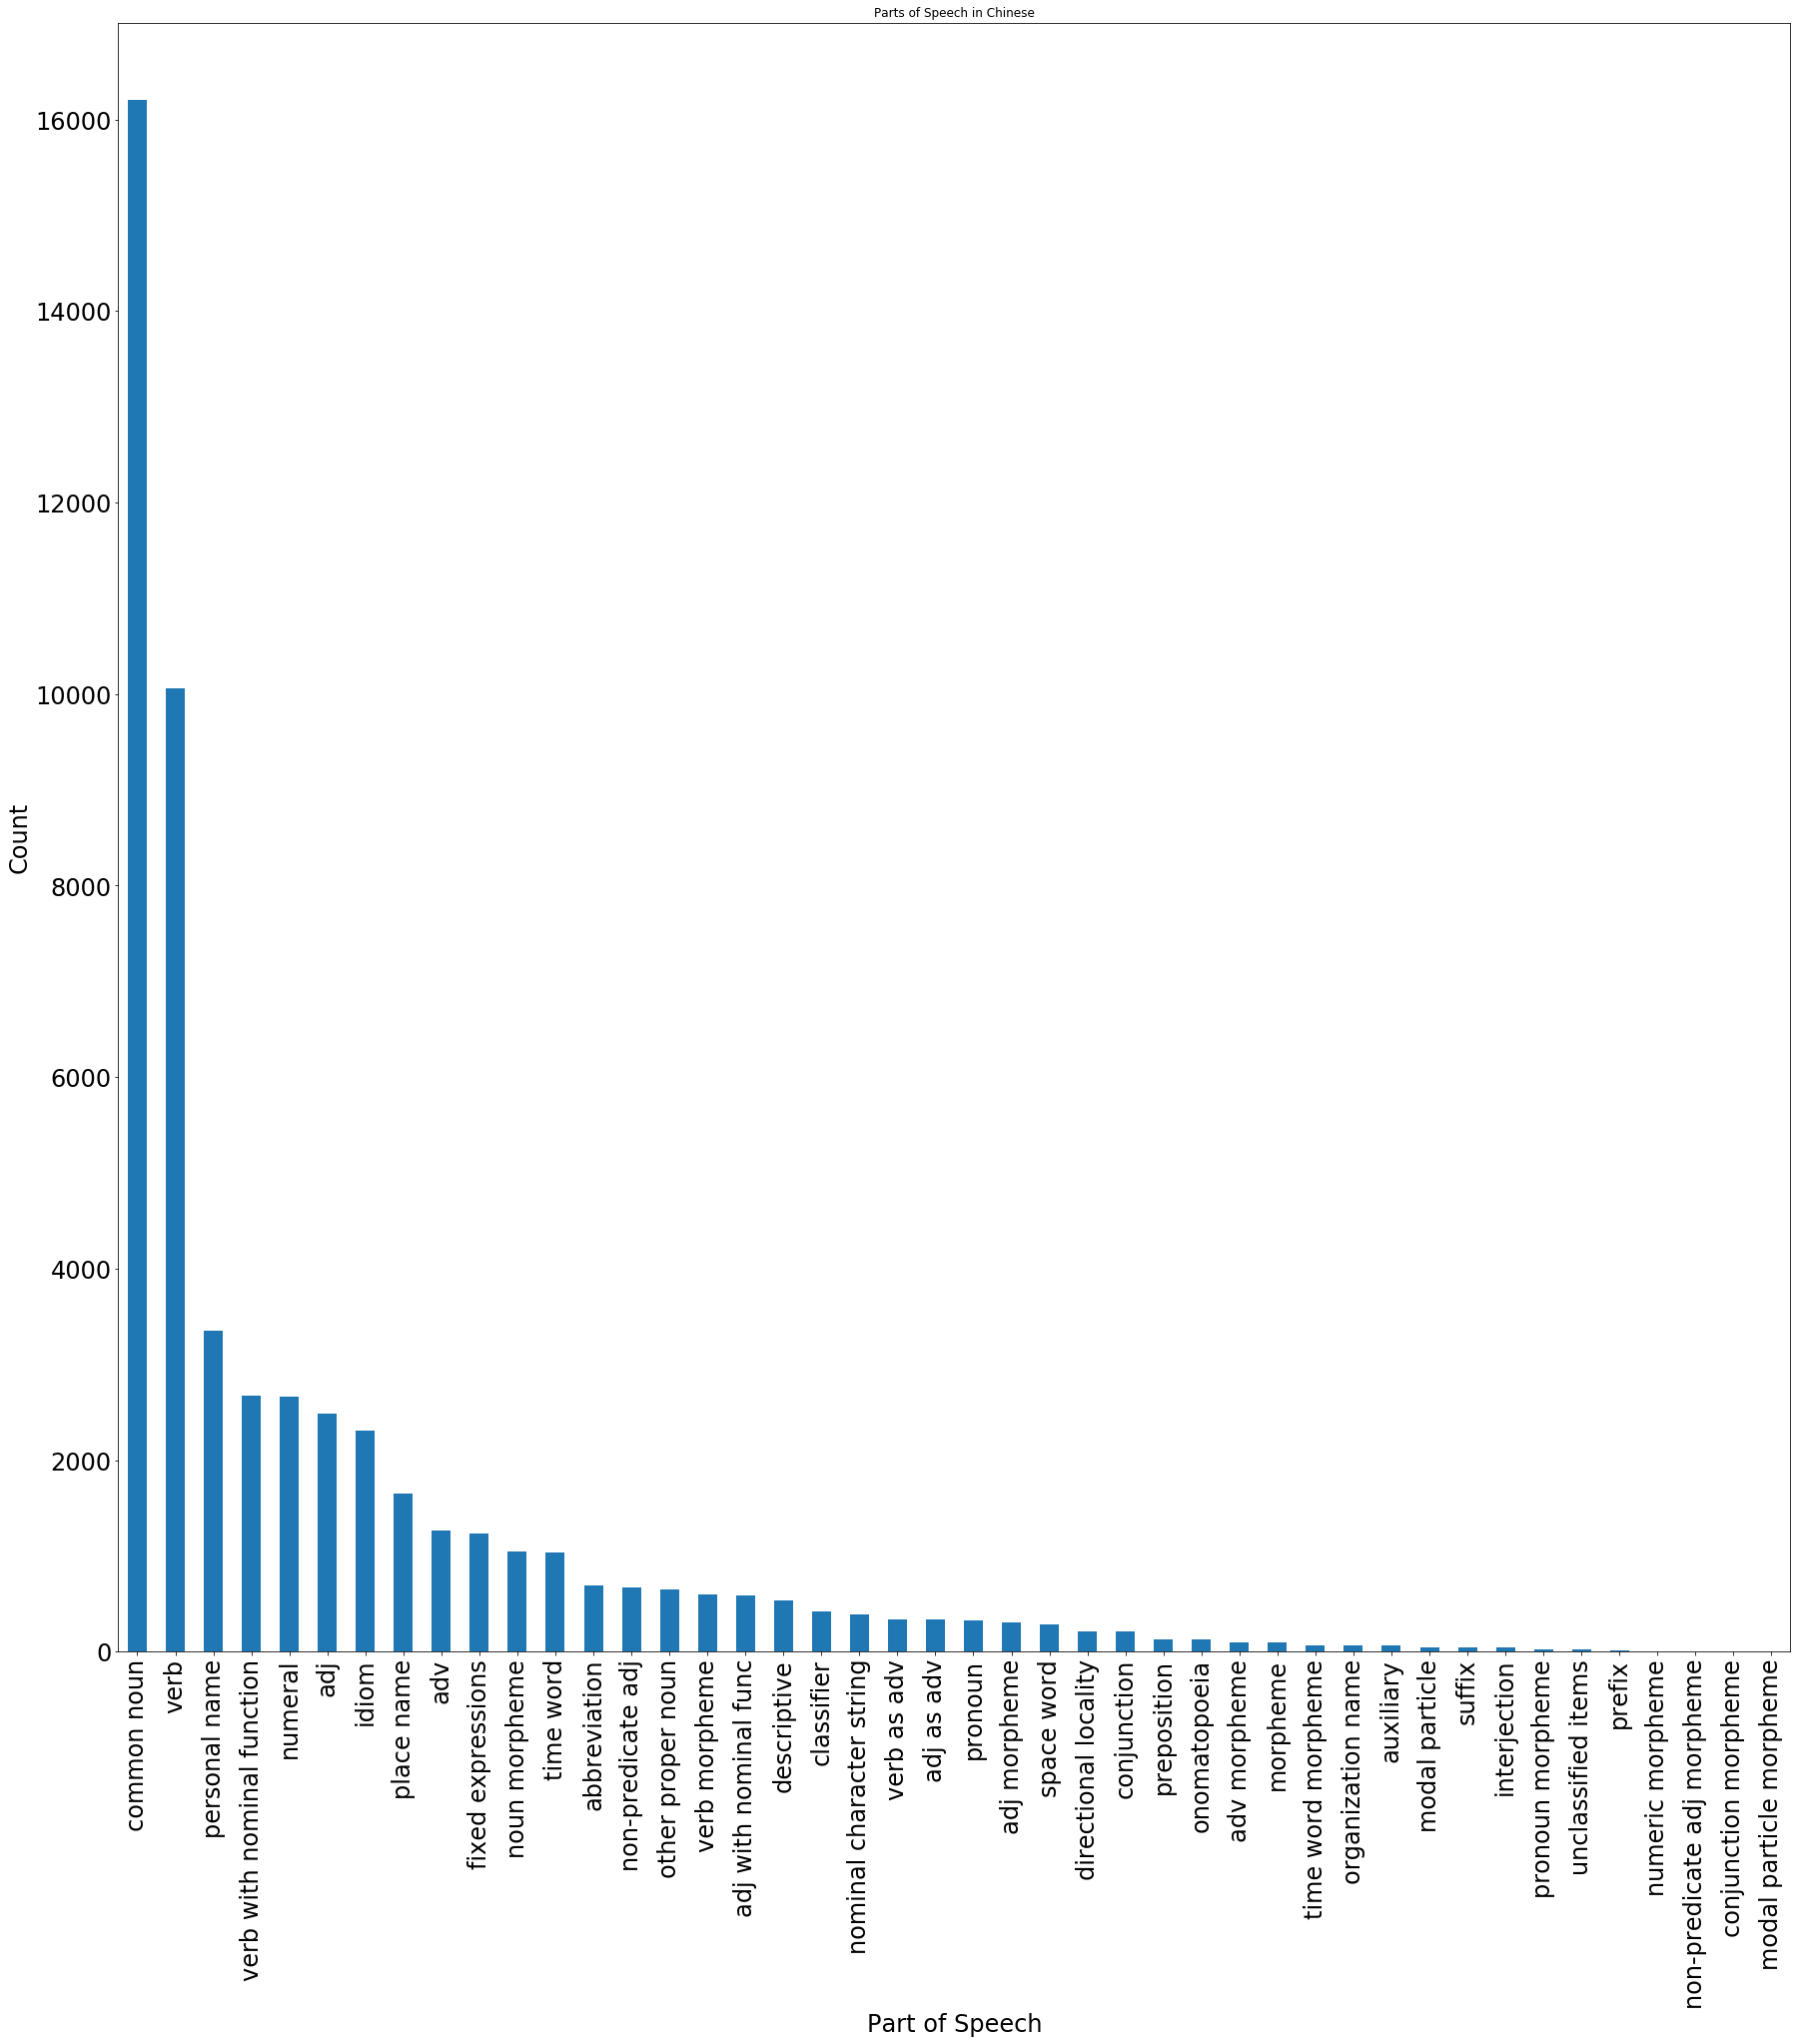

In [22]:
POS = Compiled_df['POS'].value_counts().plot(kind='bar', title = 'Parts of Speech in Chinese', figsize = (30,30), fontsize = 24)
POS.set_xlabel("Part of Speech", fontsize = 24)
POS.set_ylabel("Count", fontsize = 24)
plt.show()

In [23]:
de_final = [(w,p,pos) for (w,p,pos) in Compiled_Unique if w.endswith('的')]
len(de_final)
de_final

46

[('小小的', 'xiao3xiao3de5', 'descriptive'), ('目的', 'mu4di4', 'common noun'), ('静静的', 'jing4jing4de5', 'descriptive'), ('的的', 'de5de5', 'verb'), ('短短的', 'duan3duan3de5', 'descriptive'), ('的', 'de5', 'auxiliary'), ('好样儿的', 'hao3yang4er2de5', 'common noun'), ('当家的', 'dang1jia1de5', 'common noun'), ('小的', 'xiao3de5', 'pronoun'), ('微微的', 'wei2wei2de5', 'descriptive'), ('有的', 'you3de5', 'pronoun'), ('众矢之的', 'zhong4shi3zhi1de5', 'idiom'), ('真的', 'zhen1de5', 'adv'), ('婊子养的', 'biao3zi5yang3de5', 'fixed expressions'), ('浓浓的', 'nong2nong2de5', 'descriptive'), ('老不死的', 'lao3bu4si3de5', 'fixed expressions'), ('是的', 'shi4de5', 'modal particle'), ('妈X的', 'ma1Xde5', 'fixed expressions'), ('圆圆的', 'yuan2yuan2de5', 'descriptive'), ('的', 'de5', 'verb with nominal function'), ('的', 'de5', 'common noun'), ('高高的', 'gao1gao1de5', 'descriptive'), ('死死的', 'si3si3de5', 'descriptive'), ('他妈的', 'ta1ma1de5', 'fixed expressions'), ('的', 'de5', 'personal name'), ('长长的', 'chang2chang2de5', 'descriptive'), ('真的', 'zhen1d

Let's look at some parts of speech

In [24]:
onomatopoeia = [(w,p,pos) for (w,p,pos) in Compiled_Data if pos == 'onomatopoeia']
onomatopoeia[:10]
onomatopoeia = Counter(onomatopoeia)
onomatopoeia.most_common(10)

[('铃', 'ling2', 'onomatopoeia'), ('呀呀', 'ya1ya1', 'onomatopoeia'), ('喀嚓', 'ka1ca1', 'onomatopoeia'), ('喃喃', 'nan2nan2', 'onomatopoeia'), ('哇哇', 'wa1wa1', 'onomatopoeia'), ('隆隆', 'long2long2', 'onomatopoeia'), ('砰', 'peng1', 'onomatopoeia'), ('哇', 'wa1', 'onomatopoeia'), ('簌簌', 'su4su4', 'onomatopoeia'), ('啪', 'pai1', 'onomatopoeia')]

[(('哈哈', 'ha1ha1', 'onomatopoeia'), 19), (('呼', 'hu1', 'onomatopoeia'), 18), (('扑', 'pu1', 'onomatopoeia'), 15), (('刷', 'shua1', 'onomatopoeia'), 14), (('哇', 'wa1', 'onomatopoeia'), 13), (('嘿嘿', 'hei1hei1', 'onomatopoeia'), 13), (('喃喃', 'nan2nan2', 'onomatopoeia'), 9), (('吧', 'ba5', 'onomatopoeia'), 9), (('砰', 'peng1', 'onomatopoeia'), 8), (('刺', 'ci4', 'onomatopoeia'), 8)]

In [25]:
idiom = [(w,p,pos) for (w,p,pos) in Compiled_Data if pos == 'idiom']
idiom[:10]
idiom = Counter(idiom)
idiom.most_common(10)

[('踌躇满志', 'chou2chu2man3zhi4', 'idiom'), ('晕头转向', 'yun1tou2zhuan3xiang4', 'idiom'), ('束手无策', 'shu4shou3wu2ce4', 'idiom'), ('埋头苦干', 'mai2tou2ku3gan4', 'idiom'), ('横冲直撞', 'heng2chong1zhi2zhuang4', 'idiom'), ('强词夺理', 'qiang2ci2duo2li3', 'idiom'), ('花花世界', 'hua1hua1shi4jie4', 'idiom'), ('接踵而来', 'jie1zhong3er2lai2', 'idiom'), ('可想而知', 'ke3xiang3er2zhi1', 'idiom'), ('精神抖擞', 'jing1shen2dou3sou3', 'idiom')]

[(('艰苦奋斗', 'jian1ku3fen4dou4', 'idiom'), 25), (('无可奈何', 'wu2ke3nai4he2', 'idiom'), 22), (('全心全意', 'quan2xin1quan2yi4', 'idiom'), 19), (('解放思想', 'jie3fang4si1xiang3', 'idiom'), 17), (('小心翼翼', 'xiao3xin1yi4yi4', 'idiom'), 16), (('千方百计', 'qian1fang1bai3ji4', 'idiom'), 16), (('坚定不移', 'jian1ding4bu4yi2', 'idiom'), 16), (('引人注目', 'yin3ren2zhu4mu4', 'idiom'), 14), (('建功立业', 'jian4gong1li4ye4', 'idiom'), 14), (('彪形大汉', 'biao1xing2da4han4', 'idiom'), 14)]

In [26]:
nouns = [(w,p,pos) for (w,p,pos) in Compiled_Data if pos == 'common noun']
len(nouns)
nouns = Counter(nouns)
nouns.most_common(10)

180211

[(('人', 'ren2', 'common noun'), 4025), (('问题', 'wen4ti2', 'common noun'), 1149), (('经济', 'jing1ji4', 'common noun'), 1120), (('社会', 'she4hui4', 'common noun'), 1029), (('国家', 'guo2jia1', 'common noun'), 858), (('企业', 'qi4ye4', 'common noun'), 778), (('技术', 'ji4shu4', 'common noun'), 777), (('系统', 'xi4tong3', 'common noun'), 670), (('人们', 'ren2men5', 'common noun'), 669), (('孩子', 'hai2zi5', 'common noun'), 658)]

Let's look at some common formal vs informal text

In [27]:
# Going to try and look at formal vs informal text
informal_ni = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '你']
len(informal_ni)
formal_ni = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '您']
len(formal_ni)

2900

214

In [28]:
# More formal vs informal
informal_wife = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '老婆']
len(informal_wife)
formal_wife = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '太太']
len(formal_wife)

51

41

In [29]:
# More formal vs informal
informal_parents = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '爸妈' or w == '爸爸妈妈']
#The two terms in informal are interchangeable as one is just reduplication
formal_parents = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '父母']
len(informal_parents)
len(formal_parents)

0

187

Let's take a look at some pronouns

In [30]:
# Let's look at pronouns now
pronouns = [(w,p,pos) for (w,p,pos) in Compiled_Data if pos == 'pronoun' or pos == 'pronoun morpheme']
len(pronouns)
pronouns = Counter(pronouns)
pronouns.most_common(20)

unique_pronouns = [(w,p,pos) for (w,p,pos) in Compiled_Unique if pos == 'pronoun' or pos == 'pronoun morpheme']
len(unique_pronouns)

49714

[(('他', 'ta1', 'pronoun'), 5847), (('我', 'wo3', 'pronoun'), 5575), (('这', 'zhe4', 'pronoun'), 4142), (('你', 'ni3', 'pronoun'), 2900), (('她', 'ta1', 'pronoun'), 2825), (('我们', 'wo3men5', 'pronoun'), 1969), (('他们', 'ta1men5', 'pronoun'), 1586), (('自己', 'zi4ji3', 'pronoun'), 1578), (('那', 'na3', 'pronoun'), 1537), (('什么', 'shen2me5', 'pronoun'), 1078), (('它', 'ta1', 'pronoun'), 1077), (('这个', 'zhe4ge4', 'pronoun'), 987), (('这样', 'zhe4yang4', 'pronoun'), 852), (('其', 'qi2', 'pronoun'), 826), (('这种', 'zhe4zhong3', 'pronoun'), 798), (('这些', 'zhe4xie1', 'pronoun'), 672), (('各', 'ge4', 'pronoun'), 515), (('各种', 'ge4zhong3', 'pronoun'), 416), (('谁', 'shei2', 'pronoun'), 400), (('这里', 'zhe4li3', 'pronoun'), 385)]

352

In [31]:
# Is the male or female version of 'ta1' used more frequently? What about the gender neutral version?
male_ta = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '他']
len(male_ta)
female_ta = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '她']
len(female_ta)
neutral_ta = [(w,p,pos) for (w,p,pos) in Compiled_Data if w == '它']
len(neutral_ta)

5898

2825

1077